<a href="https://colab.research.google.com/github/FernandoCallasaca/data_science_projects/blob/main/13_datetime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparamos nuestro entorno de trabajo

## Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/My Drive/Data Science/Platzi/10. Curso de Manipulación y Análisis de datos con Pandas y Python/db/'
!ls

/content/drive/My Drive/Data Science/Platzi/10. Curso de Manipulación y Análisis de datos con Pandas y Python/db
covid_19_data.csv  Meteorite_Landings.csv  population-worldbank
london_merged.csv  notas.csv


In [3]:
path_file = lambda name_file: '/content/drive/My Drive/Data Science/Platzi/10. Curso de Manipulación y Análisis de datos con Pandas y Python/db/{}'.format(name_file)

## Libreríras

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.__version__

'1.1.5'

### Cambiamos el formato de visualización

In [5]:
pd.options.display.float_format = '{:,.3f}'.format

In [6]:
np.set_printoptions(precision=2)

# Empezamos con nuestro data set

In [7]:
# https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset?select=covid_19_data.csv
path_file_read = path_file('covid_19_data.csv')
path_file_read

'/content/drive/My Drive/Data Science/Platzi/10. Curso de Manipulación y Análisis de datos con Pandas y Python/db/covid_19_data.csv'

In [8]:
df = pd.read_csv(path_file_read)
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.000,0.000,0.000
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.000,0.000,0.000
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.000,0.000,0.000
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.000,0.000,0.000
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.000,0.000,0.000


In [9]:
df.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [10]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

In [11]:
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [12]:
list(df)

['SNo',
 'ObservationDate',
 'Province/State',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

In [13]:
# Con los que quiero trabajar
df = df[[
 'ObservationDate',
 'Country/Region',
 'Confirmed',
 'Deaths',
 'Recovered']]
df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.000,0.000,0.000
1,2020-01-22,Mainland China,14.000,0.000,0.000
2,2020-01-22,Mainland China,6.000,0.000,0.000
3,2020-01-22,Mainland China,1.000,0.000,0.000
4,2020-01-22,Mainland China,0.000,0.000,0.000
...,...,...,...,...,...
306424,2021-05-29,Ukraine,"102,641.000","2,335.000","95,289.000"
306425,2021-05-29,Netherlands,"29,147.000",245.000,0.000
306426,2021-05-29,Mainland China,"1,364.000",1.000,"1,324.000"
306427,2021-05-29,Ukraine,"87,550.000","1,738.000","83,790.000"


In [16]:
df_time = df.groupby(['ObservationDate']).sum()

In [17]:
df_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.000,17.000,30.000
2020-01-23,"1,097.000",34.000,60.000
2020-01-24,941.000,26.000,39.000
2020-01-25,"1,437.000",42.000,42.000
2020-01-26,"2,118.000",56.000,56.000
...,...,...,...
2021-05-25,"167,848,207.000","3,485,788.000","104,824,935.000"
2021-05-26,"168,416,423.000","3,498,544.000","105,380,748.000"
2021-05-27,"168,970,791.000","3,511,297.000","106,078,106.000"


In [18]:
# creamos series
df1 = df_time['Confirmed'].iloc[10:15]
df1

ObservationDate
2020-02-01   12,038.000
2020-02-02   16,787.000
2020-02-03   19,881.000
2020-02-04   23,892.000
2020-02-05   27,636.000
Name: Confirmed, dtype: float64

In [19]:
df2 = df_time['Deaths'].iloc[12:17,]
df2

ObservationDate
2020-02-03   426.000
2020-02-04   492.000
2020-02-05   564.000
2020-02-06   634.000
2020-02-07   719.000
Name: Deaths, dtype: float64

In [20]:
# Cuando los índices son fechas podemos hacer operaciones
df1 - df2

ObservationDate
2020-02-01          nan
2020-02-02          nan
2020-02-03   19,455.000
2020-02-04   23,400.000
2020-02-05   27,072.000
2020-02-06          nan
2020-02-07          nan
dtype: float64

In [21]:
df_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.000,17.000,30.000
2020-01-23,"1,097.000",34.000,60.000
2020-01-24,941.000,26.000,39.000
2020-01-25,"1,437.000",42.000,42.000
2020-01-26,"2,118.000",56.000,56.000
...,...,...,...
2021-05-25,"167,848,207.000","3,485,788.000","104,824,935.000"
2021-05-26,"168,416,423.000","3,498,544.000","105,380,748.000"
2021-05-27,"168,970,791.000","3,511,297.000","106,078,106.000"


In [22]:
# para saber cuanto estuve aumentando día a día el número de casos confirmados
df_diff = df_time.diff()
df_diff

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,nan,nan,nan
2020-01-23,540.000,17.000,30.000
2020-01-24,-156.000,-8.000,-21.000
2020-01-25,496.000,16.000,3.000
2020-01-26,681.000,14.000,14.000
...,...,...,...
2021-05-25,"531,845.000","12,752.000","577,063.000"
2021-05-26,"568,216.000","12,756.000","555,813.000"
2021-05-27,"554,368.000","12,753.000","697,358.000"


In [23]:
# sacamos el primer valor de nuestro df_time para complenat los nan
df_time.head(1).to_dict()

{'Confirmed': {Timestamp('2020-01-22 00:00:00'): 557.0},
 'Deaths': {Timestamp('2020-01-22 00:00:00'): 17.0},
 'Recovered': {Timestamp('2020-01-22 00:00:00'): 30.0}}

In [24]:
# llenamos los na 
df_diff = df_diff.fillna({'Confirmed': 557.0,
 'Deaths': 17.0,
 'Recovered':  30.0})
df_diff

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.000,17.000,30.000
2020-01-23,540.000,17.000,30.000
2020-01-24,-156.000,-8.000,-21.000
2020-01-25,496.000,16.000,3.000
2020-01-26,681.000,14.000,14.000
...,...,...,...
2021-05-25,"531,845.000","12,752.000","577,063.000"
2021-05-26,"568,216.000","12,756.000","555,813.000"
2021-05-27,"554,368.000","12,753.000","697,358.000"


In [25]:
df_time.diff().mean()

Confirmed   344,728.201
Deaths        7,167.550
Recovered   217,323.811
dtype: float64

In [26]:
# también podemos hacer la suma acumulativa
df_diff.cumsum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.000,17.000,30.000
2020-01-23,"1,097.000",34.000,60.000
2020-01-24,941.000,26.000,39.000
2020-01-25,"1,437.000",42.000,42.000
2020-01-26,"2,118.000",56.000,56.000
...,...,...,...
2021-05-25,"167,848,207.000","3,485,788.000","104,824,935.000"
2021-05-26,"168,416,423.000","3,498,544.000","105,380,748.000"
2021-05-27,"168,970,791.000","3,511,297.000","106,078,106.000"


In [27]:
# Ahora podemos hacer intervalos en los días
df_diff.resample('7D').sum()
# aquí hacemos la sumatoria de casos cada 7 días

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,"5,578.000",131.000,108.000
2020-01-29,"18,314.000",361.000,749.000
2020-02-05,"20,911.000",621.000,"3,827.000"
2020-02-12,"30,335.000",894.000,"9,668.000"
2020-02-19,"5,277.000",701.000,"13,553.000"
...,...,...,...
2021-04-28,"5,642,661.000","92,528.000","4,666,430.000"
2021-05-05,"5,331,241.000","89,658.000","4,838,711.000"
2021-05-12,"4,541,037.000","86,840.000","4,800,529.000"


In [28]:
# Ahora podemos hacer intervalos cada domingo 
df_diff.resample('W-Sun').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-26,"2,118.000",56.000,56.000
2020-02-02,"14,669.000",306.000,420.000
2020-02-09,"23,364.000",544.000,"2,769.000"
2020-02-16,"31,075.000",864.000,"7,621.000"
2020-02-23,"7,759.000",699.000,"12,528.000"
...,...,...,...
2021-05-02,"5,680,889.000","93,206.000","4,734,311.000"
2021-05-09,"5,459,865.000","90,258.000","4,759,410.000"
2021-05-16,"4,739,560.000","86,338.000","4,692,644.000"


In [29]:
# si queremos hacer la suma mensual de casos
df_diff.resample('M').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,"9,925.000",213.000,225.000
2020-02-29,"76,087.000","2,728.000","39,556.000"
2020-03-31,"771,462.000","39,242.000","138,226.000"
2020-04-30,"2,401,731.000","192,394.000","837,095.000"
2020-05-31,"2,910,561.000","138,242.000","1,626,127.000"
2020-06-30,"4,319,842.000","138,411.000","2,711,439.000"
2020-07-31,"7,127,806.000","168,508.000","5,019,965.000"
2020-08-31,"7,909,780.000","171,272.000","6,449,484.000"
2020-09-30,"8,504,867.000","163,907.000","6,847,448.000"


In [30]:
# ver cuantos datos hay para cada mes
df_diff.resample('M').count()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,10,10,10
2020-02-29,29,29,29
2020-03-31,31,31,31
2020-04-30,30,30,30
2020-05-31,31,31,31
2020-06-30,30,30,30
2020-07-31,31,31,31
2020-08-31,31,31,31
2020-09-30,30,30,30


In [31]:
# podemos aplicar el promedio de casos mensualmente
df_diff.resample('M').mean()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,992.500,21.300,22.500
2020-02-29,"2,623.690",94.069,"1,364.000"
2020-03-31,"24,885.871","1,265.871","4,458.903"
2020-04-30,"80,057.700","6,413.133","27,903.167"
2020-05-31,"93,889.065","4,459.419","52,455.710"
2020-06-30,"143,994.733","4,613.700","90,381.300"
2020-07-31,"229,929.226","5,435.742","161,934.355"
2020-08-31,"255,154.194","5,524.903","208,047.871"
2020-09-30,"283,495.567","5,463.567","228,248.267"


In [32]:
df_diff

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.000,17.000,30.000
2020-01-23,540.000,17.000,30.000
2020-01-24,-156.000,-8.000,-21.000
2020-01-25,496.000,16.000,3.000
2020-01-26,681.000,14.000,14.000
...,...,...,...
2021-05-25,"531,845.000","12,752.000","577,063.000"
2021-05-26,"568,216.000","12,756.000","555,813.000"
2021-05-27,"554,368.000","12,753.000","697,358.000"


In [33]:
# número de casos cada 12 horas
df_diff.resample('12h').sum()
# los valores nulos los autompleta con cero por sumar con el anterior

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.000,17.000,30.000
2020-01-22 12:00:00,0.000,0.000,0.000
2020-01-23 00:00:00,540.000,17.000,30.000
2020-01-23 12:00:00,0.000,0.000,0.000
2020-01-24 00:00:00,-156.000,-8.000,-21.000
...,...,...,...
2021-05-27 00:00:00,"554,368.000","12,753.000","697,358.000"
2021-05-27 12:00:00,0.000,0.000,0.000
2021-05-28 00:00:00,"499,934.000","11,820.000","554,963.000"


In [34]:
# sacamos el promedio y aquí encontramos valores nulos por no encontrar datos
df_diff.resample('12h').mean()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.000,17.000,30.000
2020-01-22 12:00:00,nan,nan,nan
2020-01-23 00:00:00,540.000,17.000,30.000
2020-01-23 12:00:00,nan,nan,nan
2020-01-24 00:00:00,-156.000,-8.000,-21.000
...,...,...,...
2021-05-27 00:00:00,"554,368.000","12,753.000","697,358.000"
2021-05-27 12:00:00,nan,nan,nan
2021-05-28 00:00:00,"499,934.000","11,820.000","554,963.000"


In [35]:
# ahora hacemos la suma pero con solo 1 valor y aparecerán los nan
df_cum = df_time.resample('12h').sum(min_count = 1)
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.000,17.000,30.000
2020-01-22 12:00:00,nan,nan,nan
2020-01-23 00:00:00,"1,097.000",34.000,60.000
2020-01-23 12:00:00,nan,nan,nan
2020-01-24 00:00:00,941.000,26.000,39.000
...,...,...,...
2021-05-27 00:00:00,"168,970,791.000","3,511,297.000","106,078,106.000"
2021-05-27 12:00:00,nan,nan,nan
2021-05-28 00:00:00,"169,470,725.000","3,523,117.000","106,633,069.000"


In [36]:
# Llenaremos los valores nulos
df_cum.ffill()
# ffill = llena los nan con los antecesores

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.000,17.000,30.000
2020-01-22 12:00:00,557.000,17.000,30.000
2020-01-23 00:00:00,"1,097.000",34.000,60.000
2020-01-23 12:00:00,"1,097.000",34.000,60.000
2020-01-24 00:00:00,941.000,26.000,39.000
...,...,...,...
2021-05-27 00:00:00,"168,970,791.000","3,511,297.000","106,078,106.000"
2021-05-27 12:00:00,"168,970,791.000","3,511,297.000","106,078,106.000"
2021-05-28 00:00:00,"169,470,725.000","3,523,117.000","106,633,069.000"


In [37]:
# ahora llenamos el nan con los predecesores
df_cum.bfill()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.000,17.000,30.000
2020-01-22 12:00:00,"1,097.000",34.000,60.000
2020-01-23 00:00:00,"1,097.000",34.000,60.000
2020-01-23 12:00:00,941.000,26.000,39.000
2020-01-24 00:00:00,941.000,26.000,39.000
...,...,...,...
2021-05-27 00:00:00,"168,970,791.000","3,511,297.000","106,078,106.000"
2021-05-27 12:00:00,"169,470,725.000","3,523,117.000","106,633,069.000"
2021-05-28 00:00:00,"169,470,725.000","3,523,117.000","106,633,069.000"


In [38]:
# también podemos completar los na con valores diferentes
df_cum.fillna(-100)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.000,17.000,30.000
2020-01-22 12:00:00,-100.000,-100.000,-100.000
2020-01-23 00:00:00,"1,097.000",34.000,60.000
2020-01-23 12:00:00,-100.000,-100.000,-100.000
2020-01-24 00:00:00,941.000,26.000,39.000
...,...,...,...
2021-05-27 00:00:00,"168,970,791.000","3,511,297.000","106,078,106.000"
2021-05-27 12:00:00,-100.000,-100.000,-100.000
2021-05-28 00:00:00,"169,470,725.000","3,523,117.000","106,633,069.000"


In [41]:
# pero nosotros usaremos interpolate
df_cum = df_cum.interpolate()
# con eso completamos con los valores medios con cada registro en este caso diario

In [42]:
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.000,17.000,30.000
2020-01-22 12:00:00,827.000,25.500,45.000
2020-01-23 00:00:00,"1,097.000",34.000,60.000
2020-01-23 12:00:00,"1,019.000",30.000,49.500
2020-01-24 00:00:00,941.000,26.000,39.000
...,...,...,...
2021-05-27 00:00:00,"168,970,791.000","3,511,297.000","106,078,106.000"
2021-05-27 12:00:00,"169,220,758.000","3,517,207.000","106,355,587.500"
2021-05-28 00:00:00,"169,470,725.000","3,523,117.000","106,633,069.000"


In [44]:
# ahora creamos la tasa de superviviencia al coronavirus
df_cum['rate'] = 1 - df_cum['Deaths'] / df_cum['Confirmed']

In [45]:
df_cum

,Confirmed,Deaths,Recovered,rate
ObservationDate,,,,
2020-01-22 00:00:00,557.000,17.000,30.000,0.969
2020-01-22 12:00:00,827.000,25.500,45.000,0.969
2020-01-23 00:00:00,"1,097.000",34.000,60.000,0.969
2020-01-23 12:00:00,"1,019.000",30.000,49.500,0.971
2020-01-24 00:00:00,941.000,26.000,39.000,0.972
...,...,...,...,...
2021-05-27 00:00:00,"168,970,791.000","3,511,297.000","106,078,106.000",0.979
2021-05-27 12:00:00,"169,220,758.000","3,517,207.000","106,355,587.500",0.979
2021-05-28 00:00:00,"169,470,725.000","3,523,117.000","106,633,069.000",0.979


In [46]:
# ahora reseteamos los indices para trabajar con variable tipo tiempo
# como una columna más
df_cum.reset_index(inplace = True)
df_cum

,ObservationDate,Confirmed,Deaths,Recovered,rate
0,2020-01-22 00:00:00,557.000,17.000,30.000,0.969
1,2020-01-22 12:00:00,827.000,25.500,45.000,0.969
2,2020-01-23 00:00:00,"1,097.000",34.000,60.000,0.969
3,2020-01-23 12:00:00,"1,019.000",30.000,49.500,0.971
4,2020-01-24 00:00:00,941.000,26.000,39.000,0.972
...,...,...,...,...,...
982,2021-05-27 00:00:00,"168,970,791.000","3,511,297.000","106,078,106.000",0.979
983,2021-05-27 12:00:00,"169,220,758.000","3,517,207.000","106,355,587.500",0.979
984,2021-05-28 00:00:00,"169,470,725.000","3,523,117.000","106,633,069.000",0.979
985,2021-05-28 12:00:00,"169,711,142.500","3,528,368.000","106,886,869.000",0.979


In [47]:
# otra forma de agrugar y solo con el tiempo
df_cum.groupby(pd.Grouper(key='ObservationDate', freq = 'M'))[['rate']].mean()

,rate
ObservationDate,
2020-01-31,0.974
2020-02-29,0.974
2020-03-31,0.960
2020-04-30,0.935
2020-05-31,0.933
2020-06-30,0.946
2020-07-31,0.957
2020-08-31,0.964
2020-09-30,0.969


In [49]:
# promedio diario pero en serio porque ['rate'] solo está en un paréntesis
sr = df_cum.groupby(pd.Grouper(key='ObservationDate', freq = '1D'))['rate'].mean()
sr

ObservationDate
2020-01-22   0.969
2020-01-23   0.970
2020-01-24   0.972
2020-01-25   0.972
2020-01-26   0.973
              ... 
2021-05-25   0.979
2021-05-26   0.979
2021-05-27   0.979
2021-05-28   0.979
2021-05-29   0.979
Freq: D, Name: rate, Length: 494, dtype: float64

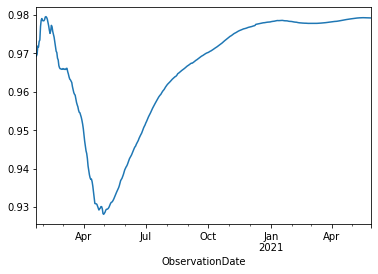

In [51]:
# esta serie podemos plotear
sr.plot()
# podemos ver la tasa de superviviencia a travez del tiempo

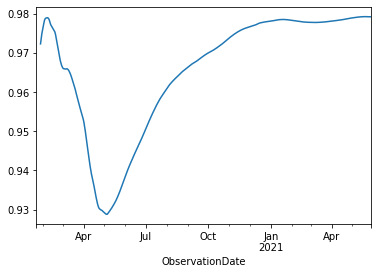

In [53]:
# ya que es una serie también podemos aplicar "rolling"
sr.rolling(window = 7).mean().plot()

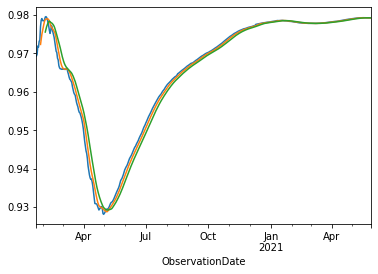

In [55]:
sr.plot()
# las ventanas son como un intervalo de 7 y 14 días
sr.rolling(window = 7).mean().plot()
sr.rolling(window = 14).mean().plot()

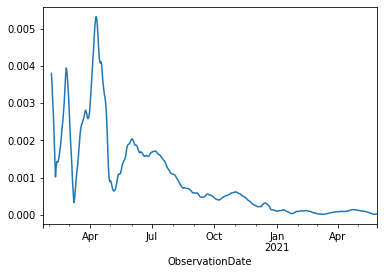

In [57]:
# desviación estandar
sr.rolling(window = 14).std().plot()

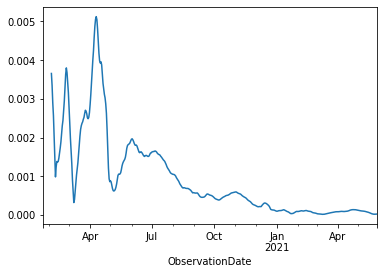

In [60]:
# desviación estandar
# también lo podemos hacer con una función
sr.rolling(window = 14).apply(lambda x: np.std(x)).plot()